## This is a notebook to read in the CLEAR and ancillary (3DHST) catalogs, select samples, and make some diagnostic plots

This uses pandas to store the catalogs as DataFrames.  You need to use the following packages.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.table import Table
from IPython.display import Image
from glob import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 

## Set directories and test that they exist:

In [2]:
cleardir = os.environ['HOME']+'/Data/CLEAR' # sets path to be $HOME/Data/CLEAR
threeddir = os.environ['HOME']+'/Data/3DHST/photometry'
catdir = os.path.join(cleardir,'CATALOGS') # sets path to $HOME/Data/CLEAR/CATALOGS
linedir = os.path.join(cleardir,'RELEASE_v1.0.0-CATALOGS')
combineddir = os.path.join(cleardir,'RELEASE_v1.0.0/COMBINED')


# All need to Exist: 
for d in [cleardir, catdir, linedir, threeddir,combineddir] :
    if os.path.exists(d) : print ("Path: %s exists" % d)
    if not os.path.exists(d) : print("Path: %s DOES NOT exist" %  d)


Path: /Users/papovich/Data/CLEAR exists
Path: /Users/papovich/Data/CLEAR/CATALOGS exists
Path: /Users/papovich/Data/CLEAR/RELEASE_v1.0.0-CATALOGS exists
Path: /Users/papovich/Data/3DHST/photometry exists
Path: /Users/papovich/Data/CLEAR/RELEASE_v1.0.0/COMBINED exists


In [3]:
gndfile = os.path.join(catdir,'goodsn_3dhst.v4.3.cat')
gndzoutfile = os.path.join(catdir,'goodsn_v4.3.zout')
gndlinefile = os.path.join(linedir,'GN_CLEAR.linefit.concat.v1.0.0.fits')
gndzfitfile = os.path.join(linedir,'GN_CLEAR.zfit.concat.v1.0.0.fits')
gndfoutfile = os.path.join(catdir,'goodsn_v4.3.fout')
#gndfoutfile = os.path.join(threeddir,'goodsn_3dhst.v4.1.cats','Fast','goodsn_3dhst.v4.1.fout')

# all need to be = True
for file in [gndfile, gndzoutfile, gndlinefile, gndzfitfile,gndfoutfile] : 
    print ("File %s exists? %s " % (file, os.path.exists(file)))

File /Users/papovich/Data/CLEAR/CATALOGS/goodsn_3dhst.v4.3.cat exists? True 
File /Users/papovich/Data/CLEAR/CATALOGS/goodsn_v4.3.zout exists? True 
File /Users/papovich/Data/CLEAR/RELEASE_v1.0.0-CATALOGS/GN_CLEAR.linefit.concat.v1.0.0.fits exists? True 
File /Users/papovich/Data/CLEAR/RELEASE_v1.0.0-CATALOGS/GN_CLEAR.zfit.concat.v1.0.0.fits exists? True 
File /Users/papovich/Data/CLEAR/CATALOGS/goodsn_v4.3.fout exists? True 


In [4]:
gsdfile = os.path.join(catdir,'goodss_3dhst.v4.3.cat')
gsdzoutfile = os.path.join(catdir,'goodss_v4.3.zout')
gsdlinefile = os.path.join(linedir,'GS_CLEAR.linefit.concat.v1.0.0.fits')
gsdzfitfile = os.path.join(linedir,'GS_CLEAR.zfit.concat.v1.0.0.fits')
gsdfoutfile = os.path.join(catdir,'goodss_v4.3.fout')
#gsdfoutfile = os.path.join(threeddir,'goodss_3dhst.v4.1.cats/','Fast','goodss_3dhst.v4.1.fout')

for file in [gsdfile, gsdzoutfile, gsdlinefile, gsdzfitfile,gsdfoutfile] : 
    print ("File %s exists? %s " % (file, os.path.exists(file)))

File /Users/papovich/Data/CLEAR/CATALOGS/goodss_3dhst.v4.3.cat exists? True 
File /Users/papovich/Data/CLEAR/CATALOGS/goodss_v4.3.zout exists? True 
File /Users/papovich/Data/CLEAR/RELEASE_v1.0.0-CATALOGS/GS_CLEAR.linefit.concat.v1.0.0.fits exists? True 
File /Users/papovich/Data/CLEAR/RELEASE_v1.0.0-CATALOGS/GS_CLEAR.zfit.concat.v1.0.0.fits exists? True 
File /Users/papovich/Data/CLEAR/CATALOGS/goodss_v4.3.fout exists? True 


In [5]:
# The COMBINED Directory is expected to look like this: 
#for d in os.listdir(combineddir) : 
for dls in os.listdir(combineddir) : 
    if dls != ".DS_Store" : 
        for d in os.listdir(os.path.join(combineddir,dls)) : 
            if d != ".DS_Store" : 
                print(os.path.join(dls,d))


1D/FITS
1D/PNG
2D/FITS
2D/PNG
LINEFIT/CHAIN_PNG
LINEFIT/DAT
LINEFIT/FITS
LINEFIT/PNG
ZFIT/2D_FITS
ZFIT/2D_PNG
ZFIT/DAT
ZFIT/FITS
ZFIT/PNG
ZFIT/PZ_FITS
ZFIT/TILT_DAT
ZFIT/TILT_PNG



### Next, read all the catalogs into PANDAS data frames
This is set up to read the ascii files. You can read them from FITS using astropy Table and pandas (that's probably easier in some ways): 

In [6]:
# define a routine to get the column names from each cat:
def getcol(catfile, doprint=True) : 
    # Get column names: 
    names = pd.read_table(catfile,nrows=1,header=None,delim_whitespace=True)
    colnames = names.values[0,1:]
    if doprint : 
        print("\nExtracting columns from %s:" % catfile)
        print(colnames)
    return(colnames)

# define a routine to read in all the catalogs: 
# You can also read in the FITS files (probably much easier)
def loadclear( catfile, zoutfile, foutfile, zfitfile, linefile, doprint=False) : 
    colnames = getcol(catfile, doprint=doprint)
    zcolnames = getcol(zoutfile, doprint=doprint)
    fcolnames = getcol(foutfile, doprint=doprint)

    cat = pd.read_table(catfile, comment='#', delim_whitespace=True, names=colnames)
    zcat = pd.read_table(zoutfile,comment='#', delim_whitespace=True, names=zcolnames)
    fcat = pd.read_table(foutfile,comment='#', delim_whitespace=True, names=fcolnames)
    
    zfittab = Table.read(zfitfile)
    zfitcat = zfittab.to_pandas()
    linetab = Table.read(linefile)
    linecat = linetab.to_pandas()
    
    return(cat, zcat, fcat, zfitcat, linecat)

gnd, gndz, gndf, gndzfit, gndline = loadclear(gndfile, gndzoutfile, gndfoutfile, 
                                              gndzfitfile, gndlinefile)
gsd, gsdz, gsdf, gsdzfit, gsdline = loadclear(gsdfile, gsdzoutfile, gsdfoutfile, 
                                              gsdzfitfile, gsdlinefile)

In the above, we now have

gnd:  CLEAR photometric catalog for GOODS-N Deep.  This is ID matched to 3DHST, but includes the HST WFC3 Y-band photometry.

gndz:  CLEAR EAZY file (z-phot) based on the broad-band photometry.

gndf:  CLEAR FOUT file (from EAZY) - has mass information, but something is odd with it... 

gndzfit:  CLEAR G102 grism redshift fits from Iva

gndlinefit:  CLEAR G102 grism emission line identification using the zfit's (thanks Iva)

Similar files for gsd for GOODS-S Deep.

Below you can display some of these: 

In [7]:
# select only objects with "use==1" and display them to see some of their properties:
pd.options.display.max_rows=10
ok = (gnd['use']==1)
display(gnd[ok],gndz[ok],gndf[ok])

,id,x,y,ra,dec,faper_F160W,eaper_F160W,faper_F140W,eaper_F140W,f_F160W,...,flux_radius,fwhm_image,flags,IRAC1_contam,IRAC2_contam,IRAC3_contam,IRAC4_contam,contam_flag,f140w_flag,use
225,226,12788.348,2473.815,189.141408,62.109100,7.619269,0.045860,5.842430,0.062487,11.505744,...,3.858,5.96,2,0.058520,0.032964,0.023086,0.001270,0,0,1
255,256,12946.611,2488.721,189.135768,62.109345,0.767948,0.045009,0.801986,0.062748,1.381249,...,5.190,0.00,0,0.172254,0.176971,0.084985,-0.308431,0,0,1
280,281,12811.438,2523.534,189.140583,62.109928,0.795675,0.045610,0.667285,0.062781,1.192493,...,4.303,0.00,0,5.330993,4.130520,-2.547717,-5.714894,1,0,1
287,288,12965.520,2542.772,189.135092,62.110245,0.815196,0.044262,0.693660,0.062921,1.346502,...,4.606,0.00,0,1.574234,1.998785,-1.129655,-8.274510,1,0,1
304,305,12943.097,2567.113,189.135890,62.110651,2.858642,0.044019,2.720275,0.062278,4.096374,...,3.525,0.00,0,0.302673,0.267507,0.076267,0.396983,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38135,38136,7182.355,18524.746,189.342144,62.376596,0.493201,0.052015,-99.000000,-99.000000,1.053838,...,5.764,0.00,0,1.868239,1.917910,1.826220,2.639237,1,0,1
38136,38137,7225.898,18527.156,189.340578,62.376638,0.429685,0.055453,-99.000000,-99.000000,0.525526,...,2.335,0.00,0,-171.124294,53.007776,10.120567,7.301445,1,0,1
38141,38142,7214.952,18548.773,189.340973,62.376998,0.845874,0.052922,-99.000000,-99.000000,2.074130,...,6.596,0.00,3,3.834465,4.428925,13.467890,-35.312603,1,0,1
38154,38155,7311.516,18598.375,189.337505,62.377827,4.886887,0.054159,-99.000000,-99.000000,9.425653,...,5.341,0.00,0,0.020112,0.035471,-0.001030,0.021380,0,0,1


,id,z_spec,z_a,z_m1,chi_a,z_p,chi_p,z_m2,odds,l68,u68,l95,u95,l99,u99,nfilt,q_z,z_peak,peak_prob,z_mc
225,226,-1.0,1.289,1.236,3.514370,1.289,3.514370,1.235,1.000,1.172,1.295,1.104,1.331,1.013,1.368,19,0.083050,1.2349,1.000,1.2977
255,256,-1.0,1.061,1.020,7.086949,1.061,7.086949,1.023,1.000,0.936,1.104,0.882,1.158,0.797,1.236,19,0.202045,1.0232,1.000,0.9563
280,281,-1.0,0.277,0.300,14.246390,0.277,14.246390,0.314,0.999,0.249,0.387,0.182,0.445,0.068,0.497,19,0.407011,0.3141,1.000,0.2920
287,288,-1.0,0.912,0.879,18.257070,0.912,18.257070,0.884,1.000,0.805,0.961,0.687,1.015,0.664,1.065,19,0.484521,0.8843,1.000,0.9287
304,305,-1.0,1.864,1.861,32.109170,1.864,32.109170,1.860,1.000,1.804,1.919,1.751,1.976,1.685,2.020,19,0.672586,1.8596,0.999,1.7922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38135,38136,-1.0,2.750,2.658,9.785613,2.731,9.796434,2.495,0.807,1.949,2.996,1.318,3.427,1.136,3.743,15,2.925070,2.4934,0.998,2.4855
38136,38137,-1.0,0.010,0.537,14.235760,2.922,19.378320,2.517,0.883,2.647,2.943,0.056,3.036,0.018,3.104,16,5.377830,2.8376,0.882,2.9244
38141,38142,-1.0,1.893,1.772,16.127950,1.879,16.134440,1.763,0.971,1.493,2.010,1.245,2.272,0.998,2.585,15,2.243150,1.7626,0.999,1.7288
38154,38155,-1.0,1.145,1.166,10.215560,1.145,10.215560,1.166,1.000,1.132,1.204,1.103,1.237,1.011,1.273,17,0.205765,1.1658,0.999,1.1941


,id,z,lmass,Av,chi_a,z_p,chi_p,z_m2,odds,l68,u68,l95,u95,l99,u99,nfilt,q_z,z_peak,peak_prob,z_mc
225,226,-1.0,1.289,1.236,3.514370,1.289,3.514370,1.235,1.000,1.172,1.295,1.104,1.331,1.013,1.368,19,0.083050,1.2349,1.000,1.2977
255,256,-1.0,1.061,1.020,7.086949,1.061,7.086949,1.023,1.000,0.936,1.104,0.882,1.158,0.797,1.236,19,0.202045,1.0232,1.000,0.9563
280,281,-1.0,0.277,0.300,14.246390,0.277,14.246390,0.314,0.999,0.249,0.387,0.182,0.445,0.068,0.497,19,0.407011,0.3141,1.000,0.2920
287,288,-1.0,0.912,0.879,18.257070,0.912,18.257070,0.884,1.000,0.805,0.961,0.687,1.015,0.664,1.065,19,0.484521,0.8843,1.000,0.9287
304,305,-1.0,1.864,1.861,32.109170,1.864,32.109170,1.860,1.000,1.804,1.919,1.751,1.976,1.685,2.020,19,0.672586,1.8596,0.999,1.7922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38135,38136,-1.0,2.750,2.658,9.785613,2.731,9.796434,2.495,0.807,1.949,2.996,1.318,3.427,1.136,3.743,15,2.925070,2.4934,0.998,2.4855
38136,38137,-1.0,0.010,0.537,14.235760,2.922,19.378320,2.517,0.883,2.647,2.943,0.056,3.036,0.018,3.104,16,5.377830,2.8376,0.882,2.9244
38141,38142,-1.0,1.893,1.772,16.127950,1.879,16.134440,1.763,0.971,1.493,2.010,1.245,2.272,0.998,2.585,15,2.243150,1.7626,0.999,1.7288
38154,38155,-1.0,1.145,1.166,10.215560,1.145,10.215560,1.166,1.000,1.132,1.204,1.103,1.237,1.011,1.273,17,0.205765,1.1658,0.999,1.1941


In [8]:
display(gndzfit,gndline)

,phot_id,grism_id,jh_mag,z_spec,z_peak_phot,z_phot_l95,z_phot_l68,z_phot_u68,z_phot_u95,z_max_grism,z_peak_grism,l95,l68,u68,u95,f_cover,f_flagged,max_contam,int_contam,f_negative
0,17986,b'GN2-G102_17986',20.228,0.5560,0.4907,0.438,0.464,0.512,0.541,0.5574,0.5574,0.5553,0.5561,0.5578,0.5586,1.00,0.00,2.07,0.04,0.01
1,20347,b'GN2-G102_20347',23.500,0.8392,0.9551,0.899,0.918,0.990,1.021,0.8395,0.8404,0.8342,0.8368,0.8430,0.8470,1.00,0.00,5.04,0.11,0.08
2,16117,b'GN2-G102_16117',22.558,0.4760,0.4515,0.388,0.419,0.486,0.526,0.4770,0.4748,0.4550,0.4670,0.4803,0.4932,0.98,0.00,9.96,0.12,0.04
3,33961,b'GN5-G102_33961',23.581,-1.0000,2.4559,2.374,2.409,2.503,2.536,2.4991,2.4947,2.4138,2.4516,2.5368,2.5707,1.00,0.00,72.05,0.15,0.05
4,20388,b'GN2-G102_20388',24.230,-1.0000,0.9087,0.783,0.820,0.988,1.037,0.8203,0.7994,0.7628,0.7712,0.8207,0.8410,0.99,0.00,68.88,0.51,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,36420,b'GN1-G102_36420',21.251,0.6338,0.6250,0.572,0.597,0.652,0.673,0.6356,0.6312,0.5703,0.6294,0.6381,0.6441,1.00,0.02,3.65,-0.04,0.06
2135,33870,b'GN3-G102_33870',23.305,-1.0000,0.8431,0.761,0.794,0.899,0.952,0.9050,0.8907,0.8468,0.8629,0.9114,0.9376,1.00,0.00,23.23,0.46,0.10
2136,17799,b'GN2-G102_17799',24.614,-1.0000,0.8324,0.772,0.791,0.877,0.902,0.8515,0.8518,0.8490,0.8501,0.8524,0.8534,1.00,0.00,12.02,0.46,0.18
2137,25531,b'GN4-G102_25531',23.841,-1.0000,1.5300,1.434,1.466,1.587,1.644,1.3762,1.4397,1.3608,1.3716,1.5618,1.5722,1.00,0.00,19.59,0.31,0.17


,phot_id,grism_id,jh_mag,z_max_grism,s0,s0_err,s1,s1_err,Lya_FLUX,Lya_FLUX_ERR,...,NeVI_FLUX,NeVI_FLUX_ERR,NeVI_SCALE,NeVI_EQW,NeVI_EQW_ERR,OI_FLUX,OI_FLUX_ERR,OI_SCALE,OI_EQW,OI_EQW_ERR
0,17986.0,b'GN2-G102_17986',20.2281,0.55737,0.760,0.007,0.584,0.023,-99.0,-99.0,...,-99.00,-99.00,-99.000,-99.00,-99.00,1.63,1.06,0.576,2.98,1.94
1,20347.0,b'GN2-G102_20347',23.5005,0.83951,0.207,0.100,0.228,0.320,-99.0,-99.0,...,-99.00,-99.00,-99.000,-99.00,-99.00,4.03,3.26,0.849,139.41,112.44
2,16117.0,b'GN2-G102_16117',22.5577,0.47698,-0.268,0.053,-1.015,0.155,-99.0,-99.0,...,-99.00,-99.00,-99.000,-99.00,-99.00,0.53,0.81,0.864,6.21,9.68
3,33961.0,b'GN5-G102_33961',23.5810,2.49908,-0.219,0.082,-1.190,0.221,-99.0,-99.0,...,-99.00,-99.00,-99.000,-99.00,-99.00,-99.00,-99.00,-99.000,-99.00,-99.00
4,20388.0,b'GN2-G102_20388',24.2305,0.82030,1.816,0.556,6.977,2.074,-99.0,-99.0,...,-99.00,-99.00,-99.000,-99.00,-99.00,-0.92,0.93,0.653,-64.49,64.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,36420.0,b'GN1-G102_36420',21.2507,0.63558,0.406,0.082,0.640,0.236,-99.0,-99.0,...,-99.00,-99.00,-99.000,-99.00,-99.00,3.28,2.01,0.810,23.34,14.62
2135,33870.0,b'GN3-G102_33870',23.3052,0.90503,-0.055,0.116,-0.315,0.322,-99.0,-99.0,...,-99.00,-99.00,-99.000,-99.00,-99.00,-99.00,-99.00,-99.000,-99.00,-99.00
2136,17799.0,b'GN2-G102_17799',24.6139,0.85151,-0.077,0.223,0.030,0.663,-99.0,-99.0,...,-99.00,-99.00,-99.000,-99.00,-99.00,-99.00,-99.00,-99.000,-99.00,-99.00
2137,25531.0,b'GN4-G102_25531',23.8407,1.37619,-0.691,0.234,-1.762,0.689,-99.0,-99.0,...,-0.23,1.74,0.768,-9.53,73.63,-99.00,-99.00,-99.000,-99.00,-99.00



## Find an object with really high [OIII] flux and display some info and Images: 


In [19]:
tok = (np.where((gndline['Hb_EQW'] > 10) & (gndline['OIII_EQW'] > 40)))[0]
pd.options.display.max_rows=9999
display(gndline.loc[tok])
pd.options.display.max_rows=10



,phot_id,grism_id,jh_mag,z_max_grism,s0,s0_err,s1,s1_err,Lya_FLUX,Lya_FLUX_ERR,...,NeVI_FLUX_ERR,NeVI_SCALE,NeVI_EQW,NeVI_EQW_ERR,OI_FLUX,OI_FLUX_ERR,OI_SCALE,OI_EQW,OI_EQW_ERR,id
1,20347.0,b'GN2-G102_20347',23.5005,0.83951,0.207,0.100,0.228,0.320,-99.0,-99.0,...,-99.0,-99.0,-99.0,-99.0,4.03,3.26,8.490000e-01,1.394100e+02,1.124400e+02,20347.0
7,38247.0,b'GN1-G102_38247',23.6608,0.93383,0.608,0.312,1.218,1.107,-99.0,-99.0,...,-99.0,-99.0,-99.0,-99.0,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01,38247.0
9,38159.0,b'GN1-G102_38159',24.1393,1.14363,-0.081,0.164,-0.530,0.492,-99.0,-99.0,...,-99.0,-99.0,-99.0,-99.0,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01,38159.0
10,32149.0,b'GN3-G102_32149',22.2279,0.87480,-0.042,0.055,-0.212,0.170,-99.0,-99.0,...,-99.0,-99.0,-99.0,-99.0,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01,32149.0
11,37927.0,b'GN1-G102_37927',24.0631,0.74892,-0.162,0.403,-1.359,1.012,-99.0,-99.0,...,-99.0,-99.0,-99.0,-99.0,0.28,1.07,8.500000e-01,1.526000e+01,6.259000e+01,37927.0
12,32162.0,b'GN5-G102_32162',21.2113,1.23558,-0.238,0.060,-2.996,0.182,-99.0,-99.0,...,-99.0,-99.0,-99.0,-99.0,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01,32162.0
14,26859.0,b'GN4-G102_26859',22.6572,1.11488,-0.040,0.066,-0.259,0.201,-99.0,-99.0,...,-99.0,-99.0,-99.0,-99.0,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01,26859.0
21,33792.0,b'GN3-G102_33792',23.2500,0.87199,0.238,0.117,0.556,0.371,-99.0,-99.0,...,-99.0,-99.0,-99.0,-99.0,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01,33792.0
25,37605.0,b'GN1-G102_37605',24.3933,0.82851,0.129,0.238,-0.108,0.698,-99.0,-99.0,...,-99.0,-99.0,-99.0,-99.0,-1.43,1.34,8.610000e-01,-1.016400e+02,9.624000e+01,37605.0
31,32632.0,b'GN3-G102_32632',22.5719,1.01778,0.204,0.085,0.863,0.287,-99.0,-99.0,...,-99.0,-99.0,-99.0,-99.0,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01,32632.0


### From above, take PHOT_ID=32632 in GND, print it's information and display its PNG:



In [20]:
print(gndzfit['phot_id'][tok[9]])

32632


In [21]:
SearchID = 32632

ok = (np.where(gndzfit['phot_id'] == SearchID))[0][0]
pd.options.display.max_rows=9999
display(gndzfit.loc[ok], gndline.loc[ok])

phot_id                     32632
grism_id        b'GN3-G102_32632'
jh_mag                     22.572
z_spec                         -1
z_peak_phot                0.8898
z_phot_l95                  0.788
z_phot_l68                  0.818
z_phot_u68                  0.966
z_phot_u95                  1.003
z_max_grism                1.0178
z_peak_grism               1.0176
l95                        1.0144
l68                        1.0158
u68                        1.0186
u95                        1.0198
f_cover                         1
f_flagged                    0.03
max_contam                  10.26
int_contam                   0.33
f_negative                   0.11
id                          32632
Name: 31, dtype: object

phot_id                       32632
grism_id          b'GN3-G102_32632'
jh_mag                      22.5719
z_max_grism                 1.01778
s0                            0.204
s0_err                        0.085
s1                            0.863
s1_err                        0.287
Lya_FLUX                        -99
Lya_FLUX_ERR                    -99
Lya_SCALE                       -99
Lya_EQW                         -99
Lya_EQW_ERR                     -99
CIV_FLUX                        -99
CIV_FLUX_ERR                    -99
CIV_SCALE                       -99
CIV_EQW                         -99
CIV_EQW_ERR                     -99
MgII_FLUX                       -99
MgII_FLUX_ERR                   -99
MgII_SCALE                      -99
MgII_EQW                        -99
MgII_EQW_ERR                    -99
OII_FLUX                        -99
OII_FLUX_ERR                    -99
OII_SCALE                       -99
OII_EQW                         -99
OII_EQW_ERR                 

Image of:
/Users/papovich/Data/CLEAR/RELEASE_v1.0.0/COMBINED/2D/PNG/GN3-G102_32632_stack.png


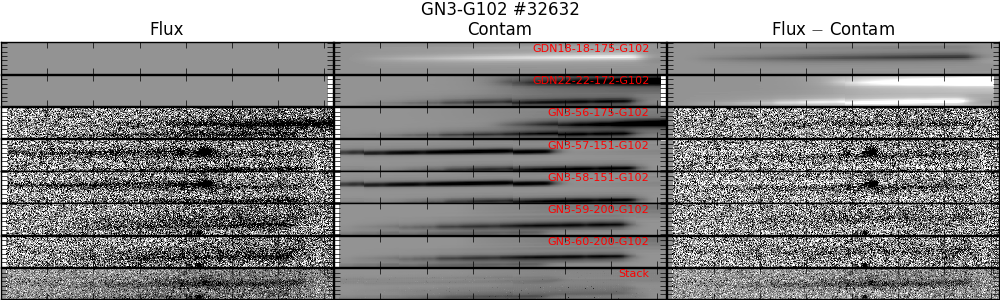

In [22]:
sname = gndzfit['grism_id'][ok].decode('ASCII')
fi = glob(combineddir+'/2D/PNG/'+gndzfit['grism_id'][ok].decode('ASCII')+'_stack.png')
print("Image of:")
print("%s" % fi[0])
Image(fi[0])

Image of:
/Users/papovich/Data/CLEAR/RELEASE_v1.0.0/COMBINED/ZFIT/PNG/GN3-G102_32632.new_zfit.png
 You should see Hb and OIII in the plots below


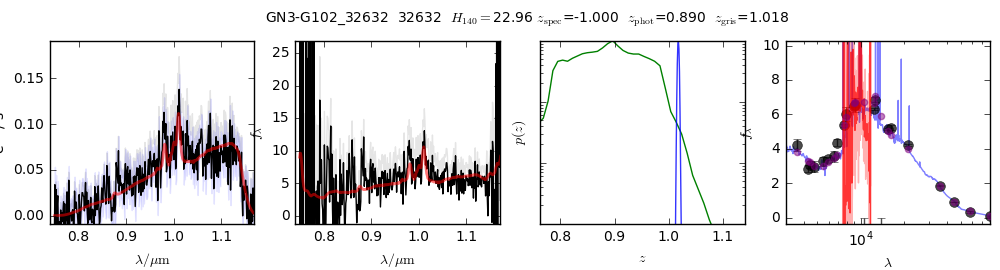

In [23]:
gi = glob(combineddir+'/ZFIT/PNG/'+sname+'.new_zfit.png')
print("Image of:")
print("%s" % gi[0])
print(" You should see Hb and OIII in the plots below")
Image(gi[0])


 
# Now, restrict objects to only those in CLEAR and do several things.
Here we make a pandas data frame, matching by ID numbers only those objects in the CLEAR ZFIT and LINE catalogs: 

We will use the pandas (pd) merge routine (pd.merge()).  (You can also use pd.concat, but that matches line-by-line.). There are other routines to match by RA and Dec. 

When the routine below is done, we have one dataframe with *all* the information from the other dataframes in it, but only for objects that appear in the CLEAR zfit and linefit catalogs.

In [24]:
# could use pd.concat, but this matches line-by-line
# gsddf = pd.concat([gsd,gsdz],axis=1) 
#gsddf = pd.concat([gsddf,gsdf],axis=1)
# default is join='outer', which pads cells with NaNs (that's what you want)  
# join='inner' only keeps rows that are in both catalogs. 
# the axis=1 means to match by ID number
#
# The only caveat is if columns in the different dataframes have the same column name - not sure what happens then.
#display(gnddf)

# INSTEAD:  here we use PANDAS MERGE routine to match based on keys (on="key") that are the name of the columns.

def domerge(gnd, gndz, gndf, gndzfit, gndlinefit) : 
    # add 'id' to zfit and linefit so we can key off those. 
    # could also use .merge(left, right, left_on='phot_id', right_on='id').... 
    gndzfit['id'] = gndzfit['phot_id']
    gndlinefit['id'] = gndlinefit['phot_id']
    # 
    
    gnddf = gndzfit
    print("Initial number of objects with grism zfits: %i" % len(gnddf))


    for f in [gnd, gndz, gndf, gndlinefit] : 
        gnddf = pd.merge(gnddf,f,on='id',how='inner')

    print("Final number (includes objects with different line identifications: %i" % len(gnddf))
    print()
    return(gnddf)

print("The reason there are more objects in the final than initial is that about ~100 objects fall in regions of overlap between CLEAR fields\n ")
gnddf = domerge(gnd,gndz,gndf, gndzfit, gndline)
gsddf = domerge(gsd,gsdz,gsdf, gsdzfit, gsdline)



The reason there are more objects in the final than initial is that about ~100 objects fall in regions of overlap between CLEAR fields
 
Initial number of objects with grism zfits: 2139
Final number (includes objects with different line identifications: 2337

Initial number of objects with grism zfits: 1792
Final number (includes objects with different line identifications: 1862



### Duplicates: 

One thing we can do is look for objects with duplicated ID numbers - these are objects that have coverage in 2 CLEAR pointings (e.g., they fall in GN3 and GN5) and so have two entries.  We can look at those: 

In [25]:
# Let's look at the Duplicates - 
# this only finds objects that have the same "phot_id" and lists them:
ok = gnddf['id'].duplicated()
#pd.options.display.max_columns = 10
display(gnddf[ok])

,phot_id_x,grism_id_x,jh_mag_x,z_spec_x,z_peak_phot,z_phot_l95,z_phot_l68,z_phot_u68,z_phot_u95,z_max_grism_x,...,NeVI_FLUX,NeVI_FLUX_ERR,NeVI_SCALE,NeVI_EQW,NeVI_EQW_ERR,OI_FLUX,OI_FLUX_ERR,OI_SCALE,OI_EQW,OI_EQW_ERR
4,33961,b'GN5-G102_33961',23.581,-1.0000,2.4559,2.374,2.409,2.503,2.536,2.4991,...,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-99.000000,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01
5,33961,b'GN3-G102_33961',23.581,-1.0000,2.4559,2.374,2.409,2.503,2.536,0.0725,...,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-99.000000,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01
6,33961,b'GN3-G102_33961',23.581,-1.0000,2.4559,2.374,2.409,2.503,2.536,0.0725,...,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-99.000000,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01
30,32135,b'GN5-G102_32135',22.139,0.6333,0.5877,0.520,0.549,0.635,0.668,0.6315,...,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-99.000000,0.32,1.21,4.740000e-01,1.420000e+00,5.460000e+00
31,32135,b'GN3-G102_32135',22.139,0.6333,0.5877,0.520,0.549,0.635,0.668,0.6315,...,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-99.000000,0.39,1.08,4.550000e-01,1.710000e+00,4.680000e+00
32,32135,b'GN3-G102_32135',22.139,0.6333,0.5877,0.520,0.549,0.635,0.668,0.6315,...,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-99.000000,0.32,1.21,4.740000e-01,1.420000e+00,5.460000e+00
41,34193,b'GN3-G102_34193',23.283,-1.0000,1.3785,1.316,1.344,1.413,1.447,1.3596,...,-0.71,2.30,5.180000e-01,-1.116000e+01,35.960000,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01
42,34193,b'GN5-G102_34193',23.283,-1.0000,1.3785,1.316,1.344,1.413,1.447,1.3584,...,-0.25,1.49,1.114000e+00,-8.010000e+00,50.100000,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01
43,34193,b'GN5-G102_34193',23.283,-1.0000,1.3785,1.316,1.344,1.413,1.447,1.3584,...,-0.71,2.30,5.180000e-01,-1.116000e+01,35.960000,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-9.900000e+01
54,32744,b'GN5-G102_32744',23.092,-1.0000,0.8865,0.809,0.846,0.930,0.970,0.7594,...,-99.00,-99.00,-9.900000e+01,-9.900000e+01,-99.000000,2.59,1.07,1.280000e+00,1.006000e+02,4.434000e+01


In [26]:
# Let's look at object 34077
ok=np.where((gnddf['phot_id_x']==34077))[0]
display(gnddf.iloc[ok])
#ok
#display(gndline[ok])

,phot_id_x,grism_id_x,jh_mag_x,z_spec_x,z_peak_phot,z_phot_l95,z_phot_l68,z_phot_u68,z_phot_u95,z_max_grism_x,...,NeVI_FLUX,NeVI_FLUX_ERR,NeVI_SCALE,NeVI_EQW,NeVI_EQW_ERR,OI_FLUX,OI_FLUX_ERR,OI_SCALE,OI_EQW,OI_EQW_ERR
398,34077,b'GN3-G102_34077',22.471,-1.0,0.0188,0.01,0.011,0.032,0.26,0.2879,...,-99.0,-99.0,-99.0,-99.0,-99.0,8.22,3.66,0.858,54.09,24.35
399,34077,b'GN3-G102_34077',22.471,-1.0,0.0188,0.01,0.011,0.032,0.26,0.2879,...,-99.0,-99.0,-99.0,-99.0,-99.0,10.29,2.12,0.739,57.84,12.45
400,34077,b'GN5-G102_34077',22.471,-1.0,0.0188,0.01,0.011,0.032,0.26,0.4521,...,-99.0,-99.0,-99.0,-99.0,-99.0,8.22,3.66,0.858,54.09,24.35
401,34077,b'GN5-G102_34077',22.471,-1.0,0.0188,0.01,0.011,0.032,0.26,0.4521,...,-99.0,-99.0,-99.0,-99.0,-99.0,10.29,2.12,0.739,57.84,12.45


In [27]:
sname = [gnddf['grism_id_x'][ok[i]].decode('ASCII') for i in range(len(ok))] 
sname


['GN3-G102_34077', 'GN3-G102_34077', 'GN5-G102_34077', 'GN5-G102_34077']

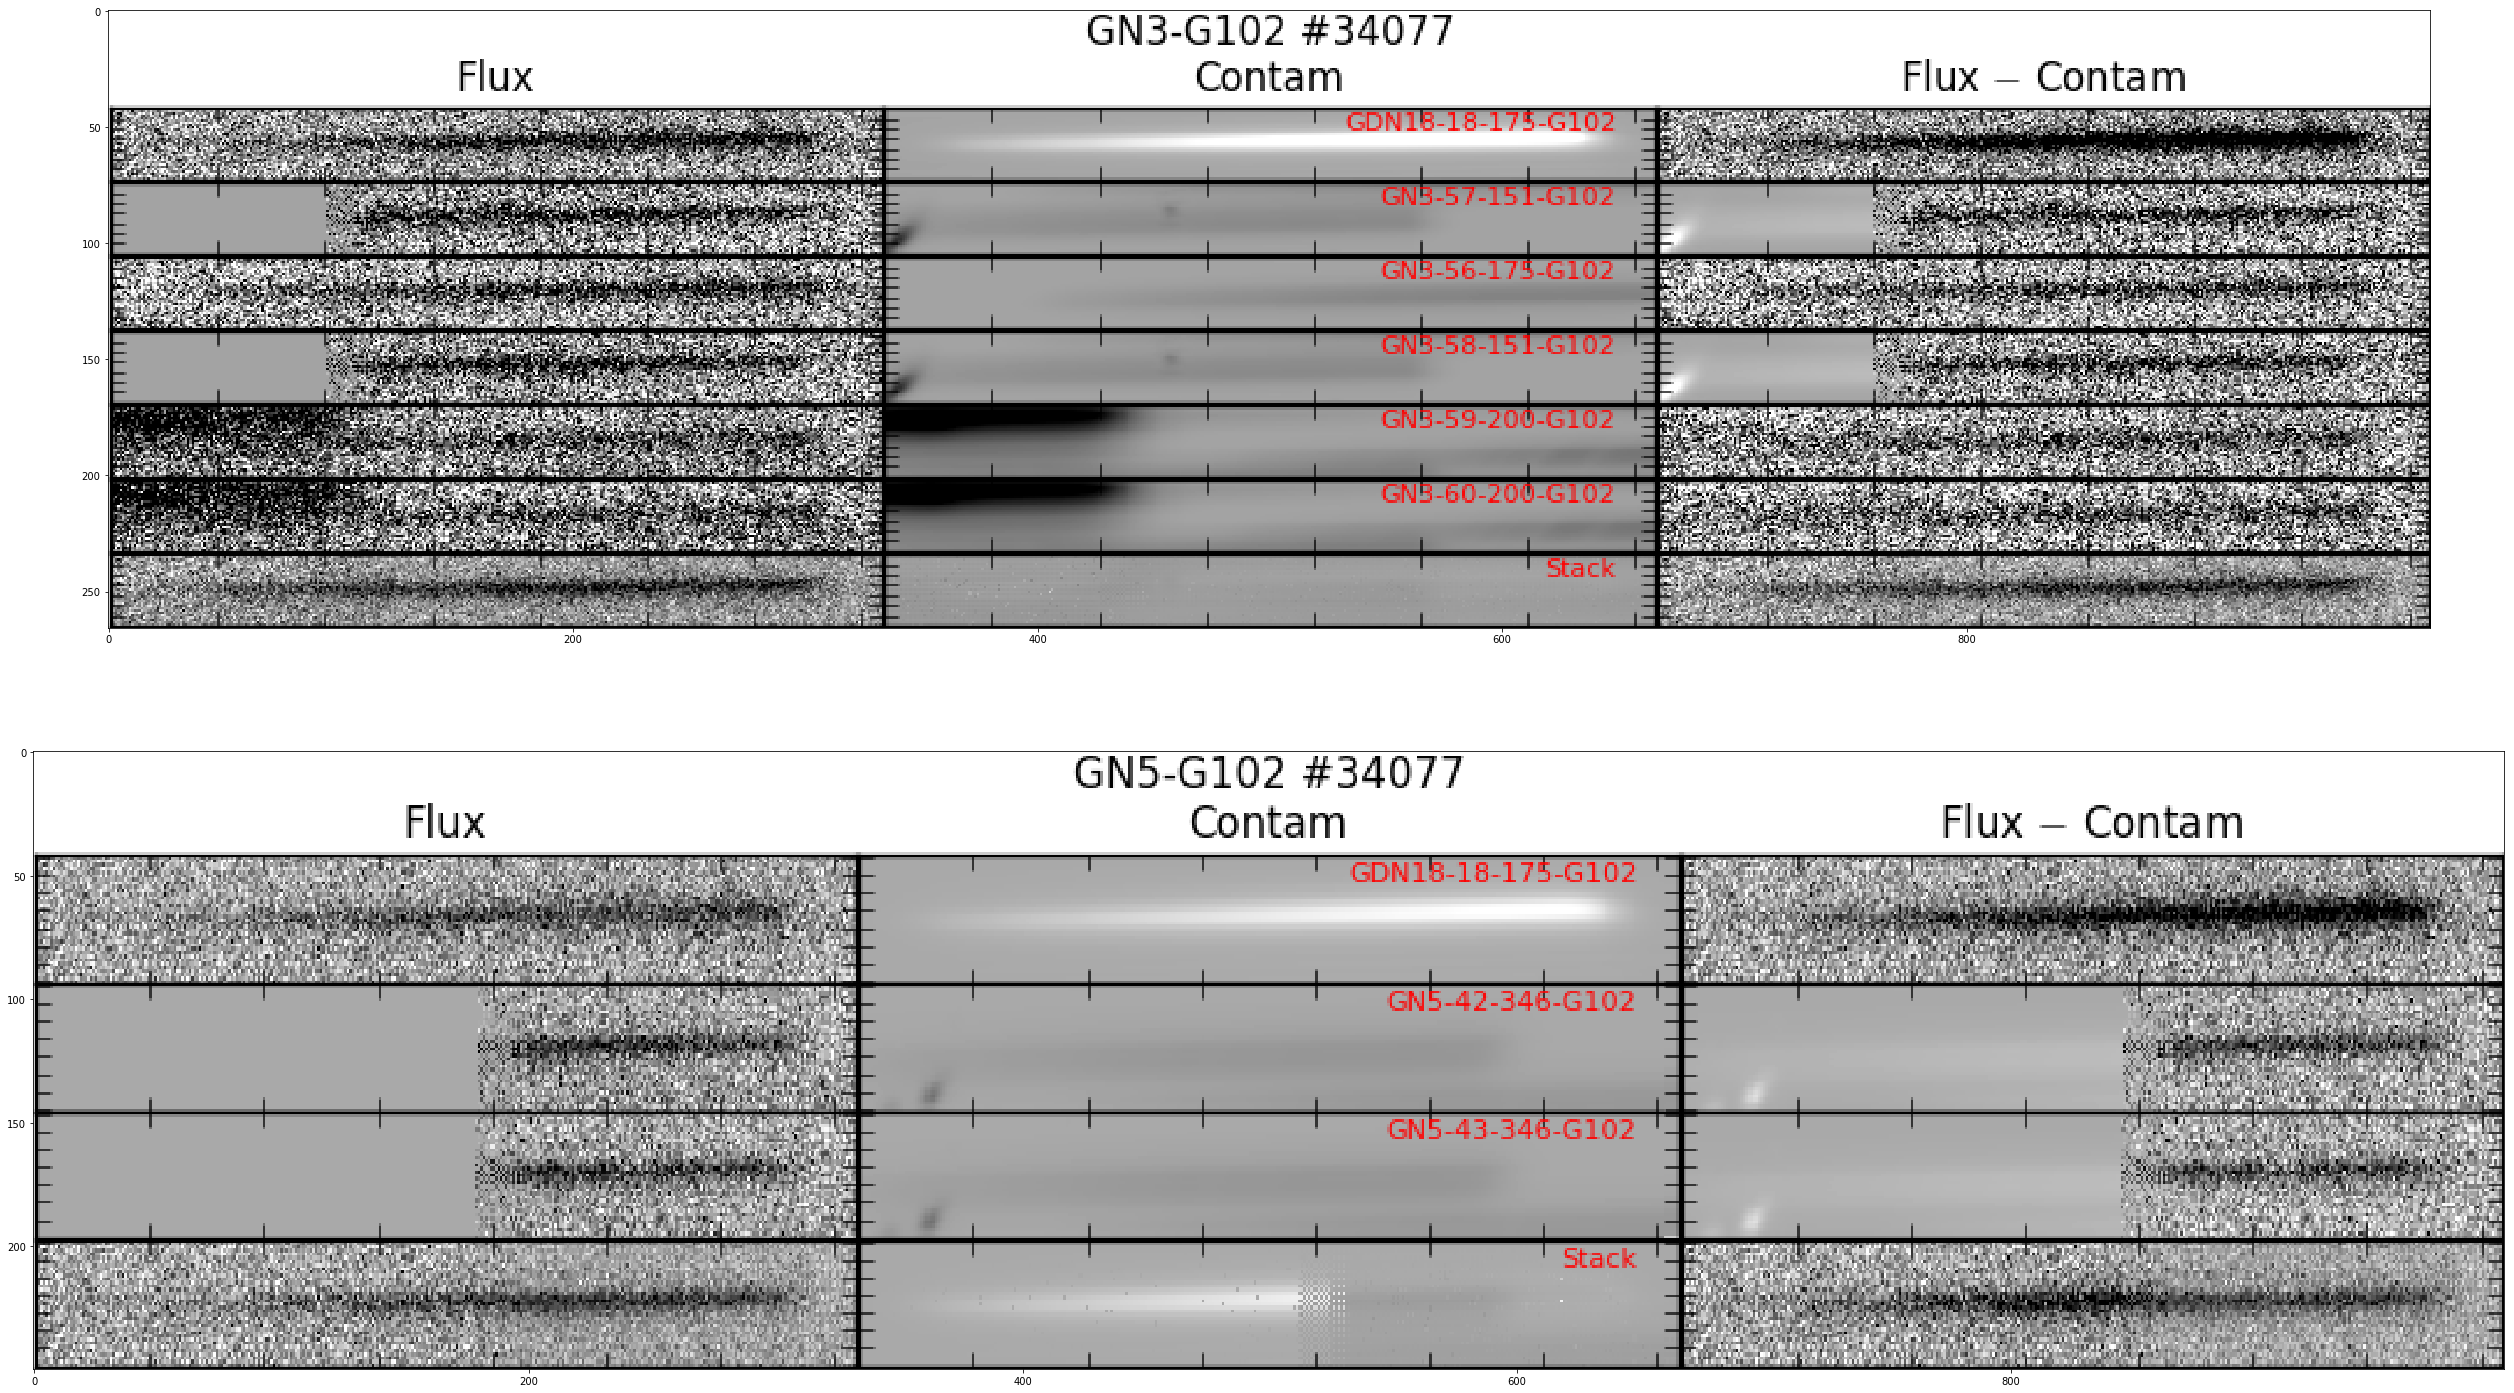

In [28]:
fig, axes = plt.subplots(2,1, figsize=(50,25))
#for s, i, j in zip(sname,[0,1,0,1], [0,0,1,1]) : 
for s, i in zip(sname[1:3], np.arange(0,2)) : 
    img=mpimg.imread(combineddir+"/2D/PNG/"+s+"_stack.png")
    axes[i].imshow(img)


# Compare z(grism) with z(phot) (latter is from broad-band fitting).

In [46]:
pd.options.display.max_rows=2
pd.options.display.max_columns=9999
display(gnddf)
pd.options.display.max_rows=10

,phot_id_x,grism_id_x,jh_mag_x,z_spec_x,z_peak_phot,z_phot_l95,z_phot_l68,z_phot_u68,z_phot_u95,z_max_grism_x,z_peak_grism,l95_x,l68_x,u68_x,u95_x,f_cover,f_flagged,max_contam,int_contam,f_negative,id,x,y,ra,dec,faper_F160W,eaper_F160W,faper_F140W,eaper_F140W,f_F160W,e_F160W,w_F160W,f_U,e_U,w_U,f_F435W,e_F435W,w_F435W,f_B,e_B,w_B,f_G,e_G,w_G,f_V,e_V,w_V,f_F606W,e_F606W,w_F606W,f_R,e_R,w_R,f_Rs,e_Rs,w_Rs,f_I,e_I,w_I,f_F775W,e_F775W,w_F775W,f_Z,e_Z,w_Z,f_F850LP,e_F850LP,w_F850LP,f_F105W,e_F105W,w_F105W,f_F125W,e_F125W,w_F125W,f_J,e_J,w_J,f_F140W,e_F140W,w_F140W,f_H,e_H,w_H,f_Ks,e_Ks,w_Ks,f_IRAC1,e_IRAC1,w_IRAC1,f_IRAC2,e_IRAC2,w_IRAC2,f_IRAC3,e_IRAC3,w_IRAC3,f_IRAC4,e_IRAC4,w_IRAC4,tot_cor,wmin_ground,wmin_hst,wmin_wfc3,wmin_irac,z_spec_y,star_flag,kron_radius,a_image,b_image,theta_J2000,class_star,flux_radius,fwhm_image,flags,IRAC1_contam,IRAC2_contam,IRAC3_contam,IRAC4_contam,contam_flag,f140w_flag,use,z_spec,z_a,z_m1,chi_a_x,z_p_x,chi_p_x,z_m2_x,odds_x,l68_y,u68_y,l95_y,u95_y,l99_x,u99_x,nfilt_x,q_z_x,z_peak_x,peak_prob_x,z_mc_x,z,lmass,Av,chi_a_y,z_p_y,chi_p_y,z_m2_y,odds_y,l68,u68,l95,u95,l99_y,u99_y,nfilt_y,q_z_y,z_peak_y,peak_prob_y,z_mc_y,phot_id_y,grism_id_y,jh_mag_y,z_max_grism_y,s0,s0_err,s1,s1_err,Lya_FLUX,Lya_FLUX_ERR,Lya_SCALE,Lya_EQW,Lya_EQW_ERR,CIV_FLUX,CIV_FLUX_ERR,CIV_SCALE,CIV_EQW,CIV_EQW_ERR,MgII_FLUX,MgII_FLUX_ERR,MgII_SCALE,MgII_EQW,MgII_EQW_ERR,OII_FLUX,OII_FLUX_ERR,OII_SCALE,OII_EQW,OII_EQW_ERR,Hd_FLUX,Hd_FLUX_ERR,Hd_SCALE,Hd_EQW,Hd_EQW_ERR,Hg_FLUX,Hg_FLUX_ERR,Hg_SCALE,Hg_EQW,Hg_EQW_ERR,OIIIx_FLUX,OIIIx_FLUX_ERR,OIIIx_SCALE,OIIIx_EQW,OIIIx_EQW_ERR,HeII_FLUX,HeII_FLUX_ERR,HeII_SCALE,HeII_EQW,HeII_EQW_ERR,Hb_FLUX,Hb_FLUX_ERR,Hb_SCALE,Hb_EQW,Hb_EQW_ERR,OIII_FLUX,OIII_FLUX_ERR,OIII_SCALE,OIII_EQW,OIII_EQW_ERR,Ha_FLUX,Ha_FLUX_ERR,Ha_SCALE,Ha_EQW,Ha_EQW_ERR,SII_FLUX,SII_FLUX_ERR,SII_SCALE,SII_EQW,SII_EQW_ERR,SIII_FLUX,SIII_FLUX_ERR,SIII_SCALE,SIII_EQW,SIII_EQW_ERR,HeI_FLUX,HeI_FLUX_ERR,HeI_SCALE,HeI_EQW,HeI_EQW_ERR,HeIb_FLUX,HeIb_FLUX_ERR,HeIb_SCALE,HeIb_EQW,HeIb_EQW_ERR,NeIII_FLUX,NeIII_FLUX_ERR,NeIII_SCALE,NeIII_EQW,NeIII_EQW_ERR,NeV_FLUX,NeV_FLUX_ERR,NeV_SCALE,NeV_EQW,NeV_EQW_ERR,NeVI_FLUX,NeVI_FLUX_ERR,NeVI_SCALE,NeVI_EQW,NeVI_EQW_ERR,OI_FLUX,OI_FLUX_ERR,OI_SCALE,OI_EQW,OI_EQW_ERR
0,17986,b'GN2-G102_17986',20.228,0.556,0.4907,0.438,0.464,0.512,0.541,0.5574,0.5574,0.5553,0.5561,0.5578,0.5586,1.0,0.0,2.07,0.04,0.01,17986,10699.604,9824.163,189.215775,62.231632,34.728437,0.02869,28.384337,0.062462,100.199600,0.211572,0.779169,3.403357,0.065443,1.0,5.383970,0.052975,0.91819,5.764843,0.062504,0.621686,6.350966,0.073317,1.0,10.578505,0.044929,0.761829,13.791727,0.043646,0.787603,25.393252,0.094003,0.813688,20.863449,0.144471,1.0,41.010961,0.124278,0.878702,28.369594,0.070969,0.720353,49.993507,0.190683,0.869826,40.155374,0.087576,0.742972,54.063512,0.051127,1.0,68.493817,0.060438,0.833445,70.947770,0.149877,0.987243,82.85356,0.180217,0.653089,116.067132,0.371098,1.000000,151.056658,0.191537,1.000000,125.277665,0.289299,1.000000,97.092396,0.211225,1.00000,100.028537,1.385544,0.944725,106.109717,1.464101,0.977693,1.010965,0.621686,0.653089,0.779169,1.000000,0.556,0,3.5,10.435,7.374,-32.3,0.03,8.023,13.03,0,0.000686,0.000855,0.001535,0.001887,0,0,1,0.556,0.498,0.491,48.10378,0.498,48.10378,0.491,1.0,0.464,0.512,0.438,0.541,0.411,0.565,23,0.383235,0.4907,1.0,0.5032,0.556,0.498,0.491,48.10378,0.498,48.10378,0.491,1.0,0.464,0.512,0.438,0.541,0.411,0.565,23,0.383235,0.4907,1.0,0.5032,17986.0,b'GN2-G102_17986',20.2281,0.55737,0.760,0.007,0.584,0.023,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.00,-99.00,-99.000,-99.00,-99.00,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,54.91,0.77,0.562,111.66,1.65,9.43,0.7,0.554,17.74,1.34,-99.0,-99.0,-99.0,-99.0,-99.0,0.97,1.31,0.6,1.74,2.34,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0

In [47]:
# select "usable" objects: 
okn = ((gnddf.use == 1) & (gnddf.z_peak_grism > 0))
oks = ((gsddf.use == 1) & (gsddf.z_peak_grism > 0))
print(len(okn),len(oks))

2337 1862


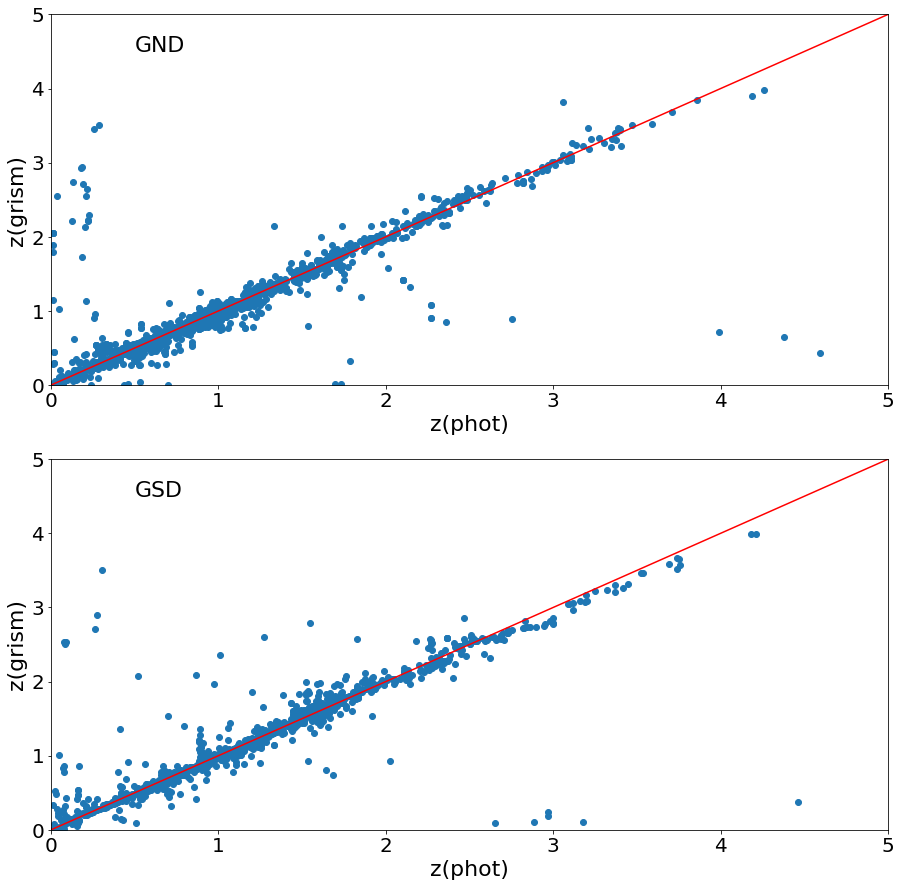

In [84]:
# Plot z(phot) against z(grism)
#mpl.rc('xtick', labelsize=20) 
#mpl.rc('ytick', labelsize=20) 
plt.rcParams.update({'font.size': 22})

fig, axes = plt.subplots(2,1, figsize=(15,15))
axes[0].scatter( gnddf['z_peak_phot'][okn], gnddf['z_peak_grism'][okn])
axes[1].scatter( gsddf['z_peak_phot'][oks], gsddf['z_peak_grism'][oks])
for ax, label in zip(axes,['GND','GSD']) : 
    ax.set_xlabel('z(phot)')
    ax.set_ylabel('z(grism)')
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    ax.plot([0,5],[0,5],'-r')
    ax.text(0.5,4.5,label)

## Now, read in 3DHST FAST catalogs, match to our objects, and plot H-alpha EW vs. stellar mass: 

In [94]:
gndfastfile = os.path.join(threeddir,
                           'goodsn_3dhst.v4.1.cats','Fast',
                           'goodsn_3dhst.v4.1.fout')
gsdfastfile = os.path.join(threeddir,
                           'goodss_3dhst.v4.1.cats','Fast',
                           'goodss_3dhst.v4.1.fout')
def readfast(fastfile,doprint=True) : 
    fcolnames = getcol(fastfile, doprint=doprint)
    fcat = pd.read_table(fastfile,comment='#', 
                         delim_whitespace=True, names=fcolnames)
    return(fcat)

gndfast = readfast(gndfastfile)
gsdfast = readfast(gsdfastfile)


Extracting columns from /Users/papovich/Data/3DHST/photometry/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout:
['id' 'z' 'ltau' 'metal' 'lage' 'Av' 'lmass' 'lsfr' 'lssfr' 'la2t' 'chi2']

Extracting columns from /Users/papovich/Data/3DHST/photometry/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout:
['id' 'z' 'ltau' 'metal' 'lage' 'Av' 'lmass' 'lsfr' 'lssfr' 'la2t' 'chi2']


In [97]:
# match the CLEAR grism line catalogs with the 3DHST FAST catalogs based on ID number
gndEW = pd.merge(gndline,gndfast,on='id',how='inner')
gsdEW = pd.merge(gsdline,gndfast, on='id', how='inner')
pd.options.display.max_rows=2
display(gndEW)
pd.options.display.max_rows=10

,phot_id,grism_id,jh_mag,z_max_grism,s0,s0_err,s1,s1_err,Lya_FLUX,Lya_FLUX_ERR,Lya_SCALE,Lya_EQW,Lya_EQW_ERR,CIV_FLUX,CIV_FLUX_ERR,CIV_SCALE,CIV_EQW,CIV_EQW_ERR,MgII_FLUX,MgII_FLUX_ERR,MgII_SCALE,MgII_EQW,MgII_EQW_ERR,OII_FLUX,OII_FLUX_ERR,OII_SCALE,OII_EQW,OII_EQW_ERR,Hd_FLUX,Hd_FLUX_ERR,Hd_SCALE,Hd_EQW,Hd_EQW_ERR,Hg_FLUX,Hg_FLUX_ERR,Hg_SCALE,Hg_EQW,Hg_EQW_ERR,OIIIx_FLUX,OIIIx_FLUX_ERR,OIIIx_SCALE,OIIIx_EQW,OIIIx_EQW_ERR,HeII_FLUX,HeII_FLUX_ERR,HeII_SCALE,HeII_EQW,HeII_EQW_ERR,Hb_FLUX,Hb_FLUX_ERR,Hb_SCALE,Hb_EQW,Hb_EQW_ERR,OIII_FLUX,OIII_FLUX_ERR,OIII_SCALE,OIII_EQW,OIII_EQW_ERR,Ha_FLUX,Ha_FLUX_ERR,Ha_SCALE,Ha_EQW,Ha_EQW_ERR,SII_FLUX,SII_FLUX_ERR,SII_SCALE,SII_EQW,SII_EQW_ERR,SIII_FLUX,SIII_FLUX_ERR,SIII_SCALE,SIII_EQW,SIII_EQW_ERR,HeI_FLUX,HeI_FLUX_ERR,HeI_SCALE,HeI_EQW,HeI_EQW_ERR,HeIb_FLUX,HeIb_FLUX_ERR,HeIb_SCALE,HeIb_EQW,HeIb_EQW_ERR,NeIII_FLUX,NeIII_FLUX_ERR,NeIII_SCALE,NeIII_EQW,NeIII_EQW_ERR,NeV_FLUX,NeV_FLUX_ERR,NeV_SCALE,NeV_EQW,NeV_EQW_ERR,NeVI_FLUX,NeVI_FLUX_ERR,NeVI_SCALE,NeVI_EQW,NeVI_EQW_ERR,OI_FLUX,OI_FLUX_ERR,OI_SCALE,OI_EQW,OI_EQW_ERR,id,z,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,chi2
0,17986.0,b'GN2-G102_17986',20.2281,0.55737,0.760,0.007,0.584,0.023,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.00,-99.00,-99.000,-99.00,-99.00,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,54.91,0.77,0.562,111.66,1.65,9.43,0.7,0.554,17.74,1.34,-99.0,-99.0,-99.0,-99.0,-99.0,0.97,1.31,0.6,1.74,2.34,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.00,-99.00,-99.000,-99.00,-99.00,-99.00,-99.00,-99.000,-99.00,-99.00,1.63,1.06,0.576,2.98,1.94,17986.0,0.56,7.4,0.02,8.0,2.0,10.03,1.04,-8.99,0.6,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,23161.0,b'GN4-G102_23161',24.2919,2.12677,-1.794,0.768,0.509,2.274,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.09,0.74,7.636,295.44,272.53,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.00,-99.00,-99.000,-99.00,-99.00,-99.00,-99.0,-99.000,-99.00,-99.00,-99.0,-99.0,-99.0,-99.0,-99.0,-99.00,-99.00,-99.0,-99.00,-99.00,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-0.41,0.39,6.972,-138.57,130.15,0.43,0.35,6.889,151.11,142.69,-99.00,-99.00,-99.000,-99.00,-99.00,23161.0,0.16,8.2,0.02,7.6,1.0,6.46,-1.12,-7.58,-0.6,3.31


In [117]:
zmin = (8500./6563. - 1)
zmax = (12500./6563. - 1)
okn = ((gndEW.Ha_EQW > 1) & (gndEW.z_max_grism > zmin) & 
                            (gndEW.z_max_grism < zmax))
oks = ((gsdEW.Ha_EQW > 1) & (gsdEW.z_max_grism > zmin) & 
                            (gsdEW.z_max_grism < zmax))
print("# of GND galaxies with Ha and %4.2f < z < %4.2f = %i" %
      (zmin, zmax, len((np.where(okn==True))[0])))
print("# of GSD galaxies with Ha and %4.2f < z < %4.2f = %i" %
      (zmin, zmax, len((np.where(oks==True))[0])))

# of GND galaxies with Ha and 0.30 < z < 0.90 = 559
# of GSD galaxies with Ha and 0.30 < z < 0.90 = 125


In [144]:
plt.rcParams.update({'font.size': 22})

fig, axes = plt.subplots(2,1, figsize=(15,15))
axes[0].scatter( gndEW['lmass'][okn], gndEW['Ha_EQW'][okn])
axes[1].scatter( gsdEW['lmass'][oks], gsdEW['Ha_EQW'][oks])

#axes[1].scatter( gsddf['z_peak_phot'][oks], gsddf['z_peak_grism'][oks])
for ax, label in zip(axes,['GND','GSD']) : 
    ax.set_xlabel('log Mass')
    ax.set_ylabel('EW(H$\alpha$)')
    ax.set_ylim([1,1000])
    ax.set_yscale("log", nonposy='clip')
    ax.set_xlim([8,11.5])
#    #ax.plot([0,5],[0,5],'-r')
    ax.text(11,500,label)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11f58f6a8> (for post_execute):


ValueError: 
EW(H$lpha$)
    ^
Expected end of text (at char 4), (line:1, col:5)

ValueError: 
EW(H$lpha$)
    ^
Expected end of text (at char 4), (line:1, col:5)